Ho: Network latency has NOT gone up since we switched internet service providers

Ha: Network latency has gone up since we switched internet service providers

True Positive: Latency really did not go up
True Negative: Latency really did go up
False Positive:(Type 1) Latency did go up and I said it did
False Negative:(Type 2) Latency did not go up I said it did

Ho: The website redesign has not fallen below the customer approval rating threshold of 95%

Ho: The website redesign has fallen below the customer approval rating threshold of 95%

True Positive:  Approval rating did not fall below 95%
True Negative:  Approval rating did fall below 95%
False Positive:(Type 1) Approval rating fell below 95% and I said it had not
False Negative:(Type 2) Approval rating did not fall below 95% and I said it had 

Ho: Sales of the new Macbook did not vary in the months following the new commercial.

Ha: Sales of the new Macbook did vary in the months following the new commercial.

True Positive:  Sales did not vary
True Negative:  Sales did vary


False Positive:(Type 1) Sales did not vary and I said they did 
False Negative:(Type 2) Sales varied and I said they did not

In [70]:
#standard data imports
import pandas as pd
import numpy as np

#pulling sample dataset
from pydataset import data

#new library!! for stats!!! 
from scipy import stats

In [2]:
import warnings

warnings.filterwarnings('ignore')
# with warnings removed 

In [3]:
alpha = 0.05

Ho: Using a macbook is not dependent on being a codeup student

Ha: Using a macbook is dependent on being a codeup student

Conclusion: My p-value is less than alpha, therefore, we reject the null hypothesis

In [75]:
data2 = {
    'Codeup_Student': [49, 1],
    'Not_Student': [20, 30]
}

In [76]:
codeup = pd.DataFrame(data2, index=['Macbook', "No_Macbook"])


In [77]:
codeup

,Codeup_Student,Not_Student
Macbook,49,20
No_Macbook,1,30


In [78]:
chi2, p, degf, expected = stats.chi2_contingency(codeup)

In [79]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

In [80]:
codeup.values

array([[49, 20],
       [ 1, 30]])

Ho: Car class does not affect the number of cylinders
Ha: Car class does affect the number of cylinders

Conculusion: My p-value is less than alpha, therefore, we reject the null hypothesis

In [81]:
mpg = data('mpg')

In [82]:
mpg.rename(columns={'class': 'class1'}, inplace=True)

In [83]:
cars = pd.crosstab(mpg.cyl, mpg.class1)
cars

class1,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [84]:
chi2, car_p, dof, expected = stats.chi2_contingency(cars)

In [85]:
cars.values

array([[ 0, 32, 16,  1,  3, 21,  8],
       [ 0,  2,  0,  0,  0,  2,  0],
       [ 0, 13, 23, 10, 10,  7, 16],
       [ 5,  0,  2,  0, 20,  5, 38]])

In [86]:
car_p

1.5351076620141522e-20

Ho: There is no relationship between gender and whether or not an employees works in sales or marketing

Ha: There is relationship between gender and whether or not an employees works in sales or marketing

p value is greater so fail to reject the null hypothesis, no relationship

In [87]:
import env
query = '''
select *
from employees as e
    join dept_emp as de
        using (emp_no)
    join departments as d
        using (dept_no)
    where to_date > now()
and dept_name in ('sales','marketing')
'''
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'  
relate = pd.read_sql(query, url)

In [88]:
relate.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing


In [22]:
mammal = pd.crosstab(relate.gender, relate.dept_name)

In [23]:
mammal

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [24]:
chi2, p, dof, expected = stats.chi2_contingency(mammal)

In [25]:
p

0.5691938610810126

In [26]:
query2 = '''select *
from dept_manager
    right join employees
        using (emp_no)''' 

managers = pd.read_sql(query2, url)

In [27]:
managers.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None


In [28]:
managers['is_manager'] = managers.to_date.notnull()

In [29]:
managers.is_manager.value_counts()

is_manager
False    300000
True         24
Name: count, dtype: int64

In [30]:
gender = pd.crosstab(managers.is_manager, managers.gender)

In [31]:
gender

gender,F,M
is_manager,,
False,120038,179962
True,13,11


In [32]:
p

#My p-value is greater than alpha, fail to reject the null hypothesis.
# We can conclude this is no relationship between gender and being a manager.

0.5691938610810126

In [ ]:
Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?
 
Pearson Corellation Coefficient
Does smoking affect when or not someone has lung cancer?
chi2
Is gender independent of a person’s blood type?
chi2
Does whether or not a person has a cat or dog affect whether they live in an apartment?
chi2
Does the length of time of the lecture correlate with a student's grade?
Pearson Corellation Coefficient

In [33]:
query3 = '''
select *
from customers'''

url2 = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'  
telco = pd.read_sql(query3, url2)

In [34]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [35]:
telco = pd.DataFrame(telco)

In [36]:
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

In [38]:
stats.pearsonr(telco.tenure, telco.monthly_charges)

PearsonRResult(statistic=0.24789985628615246, pvalue=4.094044991476844e-99)

In [39]:
telco['total_charges'] = telco.total_charges.str.replace(' ', '0.0').astype(float)

In [40]:
r,p = stats.pearsonr(telco.tenure,telco.monthly_charges)

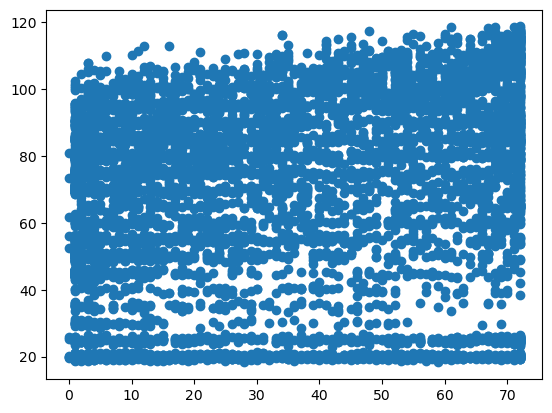

In [41]:
plt.scatter(y=telco.monthly_charges,x=telco.tenure)

plt.show()

In [42]:
r

0.24789985628615246

In [43]:
p

4.094044991476844e-99

In [44]:
telco.monthly_charges.max()

118.75

In [45]:
telco.total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [46]:
stats.pearsonr(telco.tenure, telco.total_charges)

PearsonRResult(statistic=0.8261783979502481, pvalue=0.0)

In [47]:
telco.total_charges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [48]:
telco.total_charges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64

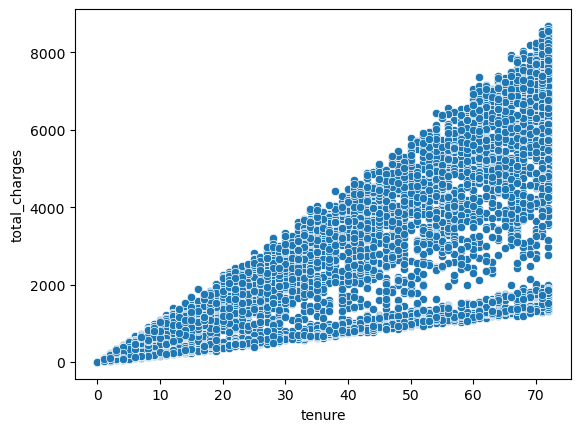

In [49]:
sns.scatterplot(data=telco, x=telco.tenure, y=telco.total_charges);

In [50]:
r, p = stats.pearsonr(telco.tenure, telco.total_charges)

In [51]:
p

0.0

In [52]:
#The p-value is less than alpha, therefore, we reject the null hypothesis.

#We can conclude there is strong linear relationship between total charges and tenure.



In [53]:
query4 = '''select * from 
    employees as e
        join salaries as s
            using (emp_no)
    where to_date > now()'''
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'  
emp = pd.read_sql(query4, url)

In [54]:
emp.to_date - emp.hire_date

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [55]:

emp['tenure_days'] = emp.to_date - emp.hire_date

In [56]:
emp.tenure_days = emp.tenure_days.astype('str').str.split(expand=True)[0]

In [57]:
emp.tenure_days = emp.tenure_days.astype(int)

<Axes: xlabel='tenure_days', ylabel='salary'>

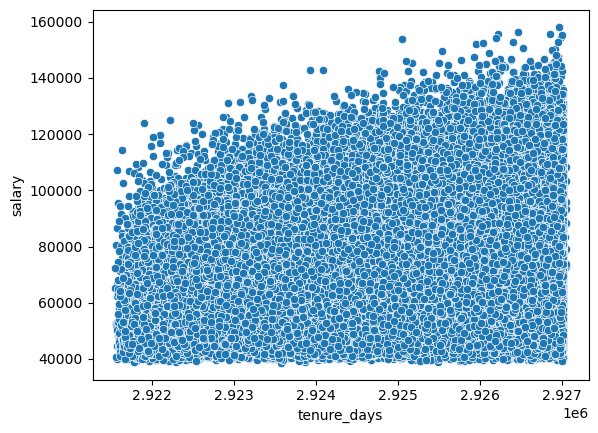

In [58]:
sns.scatterplot(data=emp, x='tenure_days', y='salary')

In [59]:
r, p = stats.pearsonr(emp.tenure_days, emp.salary)

In [60]:
p

0.0

In [61]:
#The p-value is than alpha, so we reject the null hypothesis.

#We can conclude there is a weak linear relationship between an employees salary and their tenure.

In [62]:
query5 = '''
select emp_no, count(title) as title_days
, datediff(max(to_date), hire_date) as tenure
from employees
    join titles
        using (emp_no)
group by emp_no
having max(to_date) > now()
'''

In [63]:
relati = pd.read_sql(query5, url)

In [64]:
relati.title_days.value_counts()

title_days
2    125345
1    111892
3      2887
Name: count, dtype: int64

<Axes: >

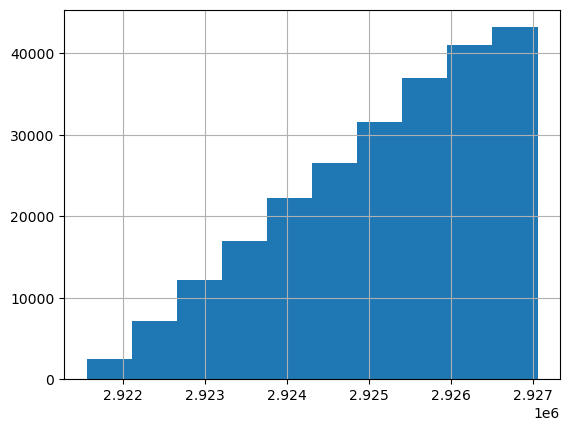

In [65]:
relati.title_days.value_counts()
relati.tenure.hist()

<Axes: xlabel='tenure', ylabel='title_days'>

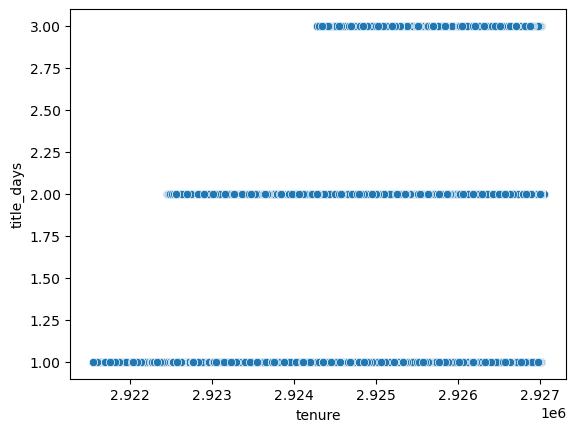

In [121]:
sns.scatterplot(data=relati, x='tenure', y='title_days')

In [ ]:
stats.spearmanr(relati.tenure, relati.title_days)

In [ ]:
#The p-value is less than alpha, so we reject the null hypothesis.

#There is a relationship between tenure and number of titles.



In [ ]:
sleep = data('sleepstudy')

In [ ]:

sleep.df.Reaction.hist()

In [ ]:
sns.scatterplot(data=df, x='Days', y='Reaction');

In [ ]:
stats.pearsonr(df.Days, df.Reaction)

In [ ]:
#The p-value is less than alpha, so we reject the null hypothesis.

#There is a correlation between days and reaction time in the sleep study.

Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?
2 sample, 1 tail 

Are adults who drink milk taller than adults who don't drink milk?
2 sample, 1 tail 

Is the price of gas higher in Texas or in New Mexico?
2 sample, 1 tail 

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
Anova

2 sample 2 tail - Ace

2 sample, 2 tail years

1 sample , 1 tail cars

In [74]:
data(show_doc=True)

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [91]:
# simulations of the offices in two different ways:
# way 1: use numpy's normal random sample
office_1 = np.random.normal(90, 15, size=(40,))
office_2 = np.random.normal(100, 20, size=(50,))
# alternatively, another simulation method:
# using stats to simulate a normal dist and then take Random ValueS
office_1 = stats.norm(90,15)
office_2 = stats.norm(100,20)

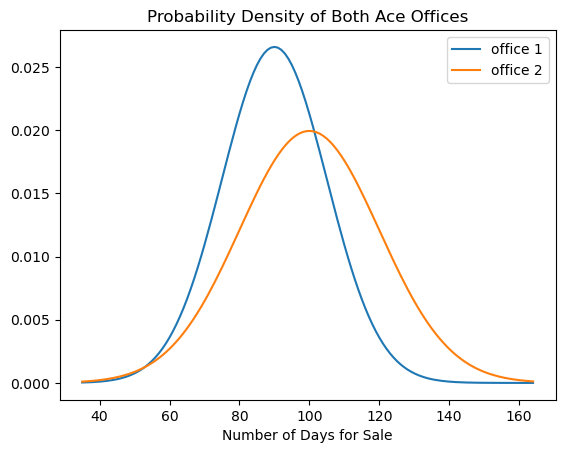

In [92]:
# a little bit of extra exploration:
x = np.arange(35, 165)
y1 = [office_1.pdf(n) for n in x]
y2 = [office_2.pdf(n) for n in x]
plt.plot(x, y1, label='office 1')
plt.plot(x, y2, label='office 2')
plt.legend()
plt.title('Probability Density of Both Ace Offices')
plt.xlabel('Number of Days for Sale')
plt.show()

In [93]:
lv_stat, p = stats.levene(office_1.rvs(40), office_2.rvs(50))
if p < 0.05:
    print('I can reject H0')
else:
    print('We fail to reject h0')

We fail to reject h0


In [94]:
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    α=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < α:
            print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < α) and (stat > 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
        else:
            if ((p/2) < α) and (stat < 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')

In [95]:
# alpha: 0.05
α = 0.05
t_stat, p = stats.ttest_ind(
    office_1.rvs(40),
    office_2.rvs(50),
    equal_var=True)

In [96]:
t_stat

-2.121161480661965

In [97]:
p

0.03672062260819779

In [101]:
mpg = mpg.assign(fuel_e = stats.hmean((mpg.cty, mpg.hwy)))

In [102]:

mpg.year.unique()

array([1999, 2008])

In [103]:
fuel_2008 = mpg[mpg.year == 2008].fuel_e
fuel_1999 = mpg[mpg.year == 1999].fuel_e

In [104]:
fuel_2008.shape

(117,)

In [105]:
fuel_1999.shape

(117,)

In [106]:
lev_stat, p = stats.levene(fuel_1999, fuel_2008)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.8602339200830025.
 Our statistic is 0.031071867429515194


In [111]:
fuel_compact = mpg[mpg.class1 == 'compact'].fuel_e

In [112]:
μ = mpg.fuel_e.mean()

In [113]:
t_stat, p = stats.ttest_1samp(fuel_compact,
                              μ)

In [114]:
p

1.5617666348807277e-09

In [115]:
#Ho: The fuel efficiency of compact cars is the same or less than the fuel efficiency of cars overall
#Ha: The fuel efficiency of compact cars is greater than the fuel efficiency of cars overall

In [116]:
mpg['is_auto'] = mpg.trans.str.lower().str.startswith('a')

In [117]:
manual_fe = mpg[~mpg.is_auto].fuel_e
auto_fe = mpg[mpg.is_auto].fuel_e

In [118]:
lev_stat, p = stats.levene(manual_fe, auto_fe)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.9062462281015493.
 Our statistic is 0.013901207169738269


In [119]:
t_stat, p = stats.ttest_ind(
    manual_fe,
    auto_fe,
    equal_var=True)
test_hypothesis(p,
                t_stat,
                tails='one',
               α=0.05)

We can reject our null hypothesis!.
 Our p-value is 5.510464610044009e-06 
 Our statistic value is 4.652577547151351
